#### Copyright 2020 Google LLC.

In [86]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# <center>Regression Project

We have learned about regression and how to build regression models using both scikit-learn and TensorFlow. Now we'll build a regression model from start to finish. We will acquire data and perform exploratory data analysis and data preprocessing. We'll build and tune our model and measure how well our model generalizes.

## Framing the Problem

### Team Members

1. Jose Martinez 
1. Wren Priest
1. Maria Quintero

### Overview

*Friendly Insurance, Inc.* has requested we do a study for them to help predict the cost of their policyholders. They have provided us with sample [anonymous data](https://www.kaggle.com/mirichoi0218/insurance) about some of their policyholders for the previous year. The dataset includes the following information:

Column   | Description
---------|-------------
age      | age of primary beneficiary
sex      | gender of the primary beneficiary (male or female)
bmi      | body mass index of the primary beneficiary
children | number of children covered by the plan
smoker   | is the primary beneficiary a smoker (yes or no)
region   | geographic region of the beneficiaries (northeast, southeast, southwest, or northwest)
charges  | costs to the insurance company

We have been asked to create a model that, given the first six columns, can predict the charges the insurance company might incur.

The company wants to see how accurate we can get with our predictions. If we can make a case for our model, they will provide us with the full dataset of all of their customers for the last ten years to see if we can improve on our model and possibly even predict cost per client year over year.

### Exercise 1: Thinking About the Data

Before we dive in to looking closely at the data, let's think about the problem space and the dataset. Consider the questions below.

#### Question 1

Is this problem actually a good fit for machine learning? Why or why not?

##### **Student Solution**

> Yes, this problem is actually a good fit for machine learning because it makes us analyze a large set of data with many variables that relate to each other and can be used to predict the end goal that is predicting the cost of insurance per client. 

---

#### Question 2

If we do build the machine learning model, what biases might exist in the data? Is there anything that might cause the model to have trouble generalizing to other data? If so, how might we make the model more resilient?

##### **Student Solution**

> There may be a bias towards age and region. Age is a bias since children are largely susceptible to get sick depending on the conditions they are living in. Region is also a bias since different environments can affect health. For example an area with more polution can cause more health problems to the general population. There are also factors that are not taken into account such as any already existing health conditions like diabetes. Another factor not taken into account is other possible health habits such as vegetarian, drinking, or vegan. 

---

#### Question 3

We have been asked to take input features about people who are insured and predict costs, but we haven't been given much information about how these predictions will be used. What effect might our predictions have on decisions made by the insurance company? How might this affect the insured?

##### **Student Solution**

> The results of our predictions may positively or negatively affect the insurance insured. A prediction that results in a lower cost for young adults may benefit young adults. Instead, a prediction that results in a higher cost will likely cause a negative impact towards clients. The insurance company will benefit from the data because they will be able to better profit from clients with a lower cost and reduce losses from clients with a higher cost. 

---

## Exploratory Data Analysis

Now that we have considered the societal implications of our model, we can start looking at the data to get a better understanding of what we are working with.

The data we'll be using for this project can be [found on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Upload your `kaggle.json` file and run the code block below.

In [87]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'
! kaggle datasets download mirichoi0218/insurance
! ls

chmod: cannot access 'kaggle.json': No such file or directory
401 - Unauthorized
insurance.zip  sample_data


### Exercise 2: EDA and Data Preprocessing

Using as many code and text blocks as you need, download the dataset, explore it, and do any model-independent preprocessing that you think is necessary. Feel free to use any of the tools for data analysis and visualization that we have covered in this course so far. Be sure to do individual column analysis and cross-column analysis. Explain your findings.

#### **Student Solution**

In [88]:
import pandas as pd
import seaborn as sns
import sklearn as sk
import tensorflow as tf

### Loading data into a DataFrame

In [89]:
df = pd.read_csv('insurance.zip')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


---

## Preprocessing and Analysis

Preprocessing involves taking any categorical variables present in the insurance dataframe and converting into values that can analyzed by some sort of regressional model. The pandas `get_dummies()` method converts any categorical variable into dummy/indicator variables. The post-processed dataframe is stored in the variable `df` and the original dataframe is stored in `og`.

In [90]:
og = pd.read_csv('insurance.zip')
df = pd.read_csv('insurance.zip')

#clean data
df = pd.get_dummies(df)
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


### Heatmap

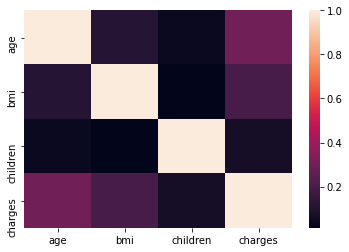

In [91]:
sns.heatmap(og.corr())

The following heatmap illustrates which features are the most correlated with one another. For example, Age is the most correlated with bmi.

## Modeling

Now that we understand our data a little better, we can build a model. We are trying to predict 'charges', which is a continuous variable. We'll use a regression model to predict 'charges'.

### Exercise 3: Modeling

Using as many code and text blocks as you need, build a model that can predict 'charges' given the features that we have available. To do this, feel free to use any of the toolkits and models that we have explored so far.

You'll be expected to:
1. Prepare the data for the model (or models) that you choose. Remember that some of the data is categorical. In order for your model to use it, you'll need to convert the data to some numeric representation.
1. Build a model or models and adjust parameters.
1. Validate your model with holdout data. Hold out some percentage of your data (10-20%), and use it as a final validation of your model. Print the root mean squared error. We were able to get an RMSE between `3500` and `4000`, but your final RMSE will likely be different.

#### **Student Solution**

###Histogram

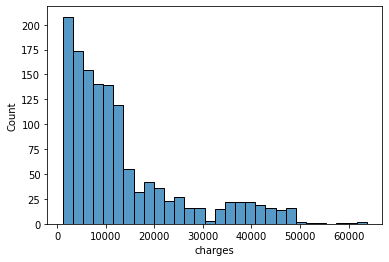

In [92]:
sns.histplot(data=og.charges)

A histogram showing the distrbution of charges was made to get an idea of the range of potential target values for our model.

###Splitting the Data and getting Target and Feature Columns 

Separating data into training and testing sets is an important part of evaluating data mining models. A training set and test set is separted from the original data set at random. This is done to minimize the effects of data discrepancies and can help easily assess the quality of our produced the model.

The training data is used to create the model itself. The features from the test data are used as inputs for the model produced, where the target values predicted are compared to the actual target values from the testing data.

In [93]:
# Shuffle
df = df.sample(frac=1)

# Calculate test set size
test_set_size = int(len(df) * 0.2)

# Split the data
testing_df = df[:test_set_size]
training_df = df[test_set_size:]

print(f'Holding out {len(testing_df)} records for testing. ')
print(f'Using {len(training_df)} records for training.')

Holding out 267 records for testing. 
Using 1071 records for training.


---

In [94]:
#Getting target and feature columns 
target_column = 'charges'
feature_columns = [c for c in df.columns if c != target_column]

print(target_column)
print(feature_columns)

charges
['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']


### Standardization

In [95]:
#Scaling data


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#Standard Scalar
df['age'] = StandardScaler().fit_transform(og[['age']])
df['bmi'] = StandardScaler().fit_transform(og[['bmi']])


#Robust Scalar
df['children'] = RobustScaler().fit_transform(og[['children']])
df['charges'] = RobustScaler().fit_transform(og[['charges']])
df

In [97]:
#running the model

from tensorflow import keras
from tensorflow.keras import layers
import math
import numpy as np
from sklearn import metrics

# making deep neural network with hidden layers
feature_count = len(feature_columns)

model = keras.Sequential([
  layers.Dense(1024, input_shape=[feature_count]),
  layers.Dense(512),
  layers.Dense(128),
  layers.Dense(1)
])

# how and what to optimize the model for
model.compile(
  loss='mse',
  optimizer='Adam',
  metrics=['mae', 'mse'],
)

## added code
model.add(layers.Activation(tf.keras.activations.relu))
## added code

# actually train model
model.fit(
  training_df[feature_columns],
  training_df[target_column],
  epochs=30,
  validation_split=0.2,
)

# validate model
predictions = model.predict(testing_df[feature_columns])

# check mean squared error
mean_squared_error = metrics.mean_squared_error(
    np.array(predictions),
    testing_df[target_column] 
)
print("Mean Squared Error (on training data): %0.3f" % mean_squared_error)

root_mean_squared_error = math.sqrt(mean_squared_error)
print("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)






Epoch 1/30
27/27 [==============================] - 1s 17ms/step - loss: 229367840.0000 - mae: 10542.5254 - mse: 229367840.0000 - val_loss: 144008400.0000 - val_mae: 10625.2012 - val_mse: 144008400.0000
Epoch 2/30
27/27 [==============================] - 0s 11ms/step - loss: 129684856.0000 - mae: 8714.7041 - mse: 129684856.0000 - val_loss: 133564784.0000 - val_mae: 9741.1816 - val_mse: 133564784.0000
Epoch 3/30
27/27 [==============================] - 0s 12ms/step - loss: 126834384.0000 - mae: 8995.0684 - mse: 126834384.0000 - val_loss: 129373744.0000 - val_mae: 9073.2314 - val_mse: 129373744.0000
Epoch 4/30
27/27 [==============================] - 0s 11ms/step - loss: 124136896.0000 - mae: 8735.6045 - mse: 124136896.0000 - val_loss: 127316520.0000 - val_mae: 9256.1348 - val_mse: 127316520.0000
Epoch 5/30
27/27 [==============================] - 0s 11ms/step - loss: 123625192.0000 - mae: 8662.8340 - mse: 123625192.0000 - val_loss: 125299704.0000 - val_mae: 8406.5771 - val_mse: 12529970

### Generated Answers

**Generated Mean Squared Error**: 6613.586